<a href="https://colab.research.google.com/github/MerlijnvEmmerik/Mijnrel/blob/master/Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.

Before we start - we have to use Python2 (not Python 3), so we should choose this as an option in "Runtime" -> "Change Runtime Type" at the top.

In [35]:
!mkdir -p APPS
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz

#we are going to make a directory called APPS
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz




--2020-03-09 08:39:59--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.7’

root_v6.13.08.Linux 100%[===================>] 131.05M  25.2MB/s    in 5.9s    

2020-03-09 08:40:06 (22.0 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.7’ saved [137415272/137415272]



In [36]:
#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

#ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

<CDLL '/content/APPS/root/lib/libFoam.so', handle 55cccc171400 at 7fd1a48a3f90>

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


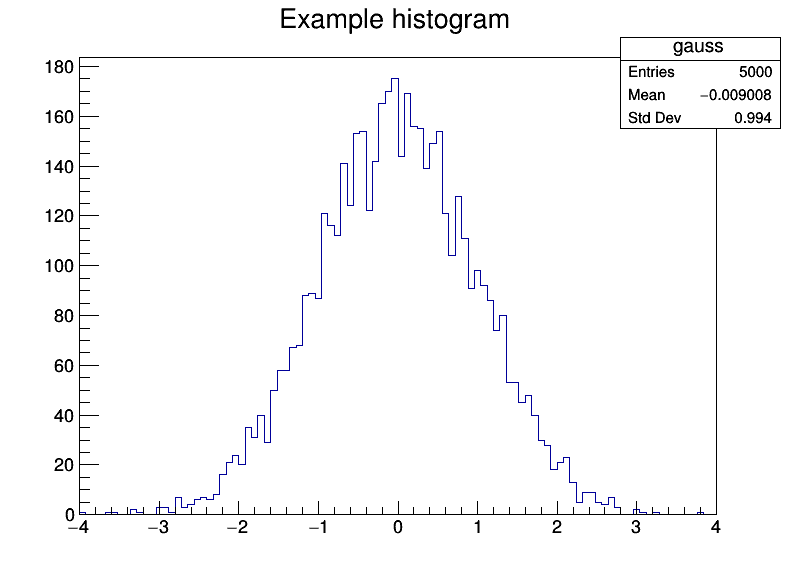

In [37]:


#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()



All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data from CERN:

In [38]:
!mkdir -p DATA && cd DATA  && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root

--2020-03-09 08:40:13--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 188.184.93.89, 188.184.28.138, 188.185.82.144, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.184.93.89|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root.4’

B2HHH_MagnetUp.root 100%[===================>] 424.12M  16.0MB/s    in 23s     

2020-03-09 08:40:37 (18.5 MB/s) - ‘B2HHH_MagnetUp.root.4’ saved [444723234/444723234]



Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName


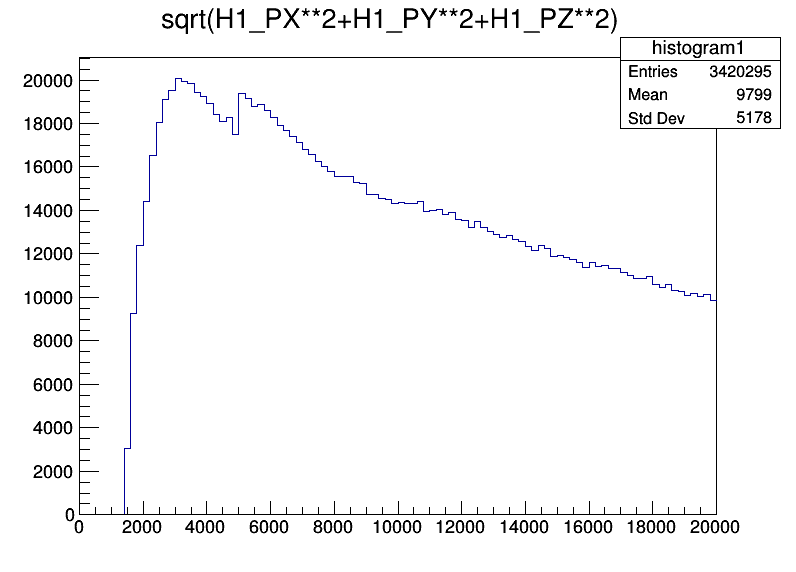

In [39]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
# Now we create a canvas, plot our data onto the canvas and draw it:

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw("sqrt(H1_PX**2+H1_PY**2+H1_PZ**2)>>histogram1(100,0,20000)")
#tree.Draw("sqrt((H1_PX**2)+(H1_PY**2)+(H1_PZ**2))+>>histogram1,100")
histogram1 = ROOT.gDirectory.Get("histogram1")
#histogram1.Draw()
#Show me the canvas
c.Draw()

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. We have to use some detective work to extract the information we need on the original physics process at play.


Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We need to first combine this into a single measurement

In [43]:
#We need to tell Python what the total momentum is defined as mathematically - do that in this code block:
import numpy as np
from math import *
#Hint: I suggest we define a function which we might want to use later - something like:

def p_tot_daughter(daughter): 
  p_tot = "(sqrt(("+ daughter+"_PY)**2+("+daughter+"_PX)**2 +("+daughter+"_PZ)**2))"
  return p_tot
  
#total_momentum = ROOT.RooRealVar(p_tot_daughter("H3"),"Total Momentum",0,10000,"MeV/c")

p_tot_daughter("H1")
p_tot_daughter("H2")
p_tot_daughter("H3")

'(sqrt((H3_PY)**2+(H3_PX)**2 +(H3_PZ)**2))'

Now plot the total momentum for one (or more) of the daughter particles.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Momentum1 partcile
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Momentum2 partcile
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Momentum3 partcile


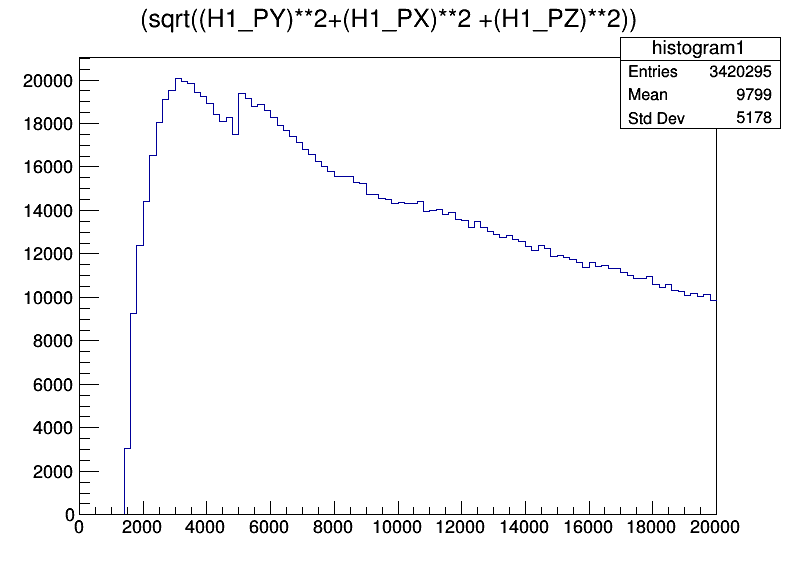

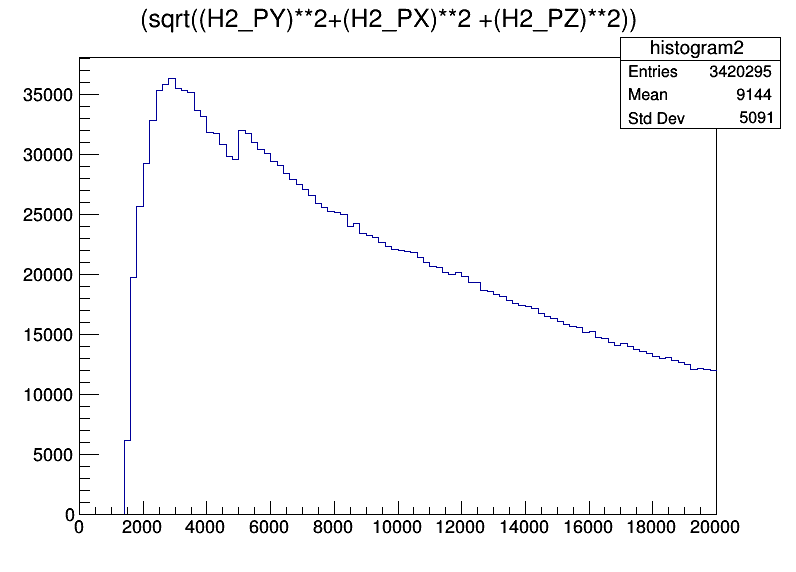

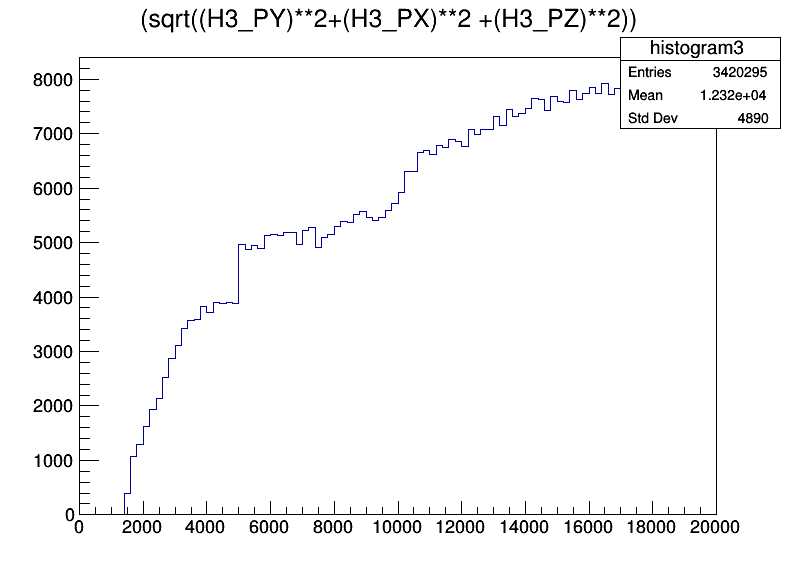

In [41]:


#Since we need to use ROOT, we must first import this into Python:
import ROOT

#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")

#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")


#H1 Histogram
c1 = ROOT.TCanvas("Momentum1 partcile","Momentum",800,600)
tree.Draw(p_tot_daughter("H1")+">>histogram1(100,0,20000)")
histogram1 = ROOT.gDirectory.Get("histogram1")
c1.Draw()

#H2 Histogram
c2 = ROOT.TCanvas("Momentum2 partcile","Momentum",800,600)
tree.Draw(p_tot_daughter("H2")+">>histogram2(100,0,20000)")
histogram2 = ROOT.gDirectory.Get("histogram2")
c2.Draw()

#H3 Histogram
c3 = ROOT.TCanvas("Momentum3 partcile","Momentum",800,600)
tree.Draw(p_tot_daughter("H3")+">>histogram3(100,0,20000)")
histogram3 = ROOT.gDirectory.Get("histogram3")
c3.Draw()





The next step is to use the total momentum of the Kaon and its invarient mass (found with a small amount of research) and your relativity knowledge to get an equation for the energy of the Kaon. 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Energy1


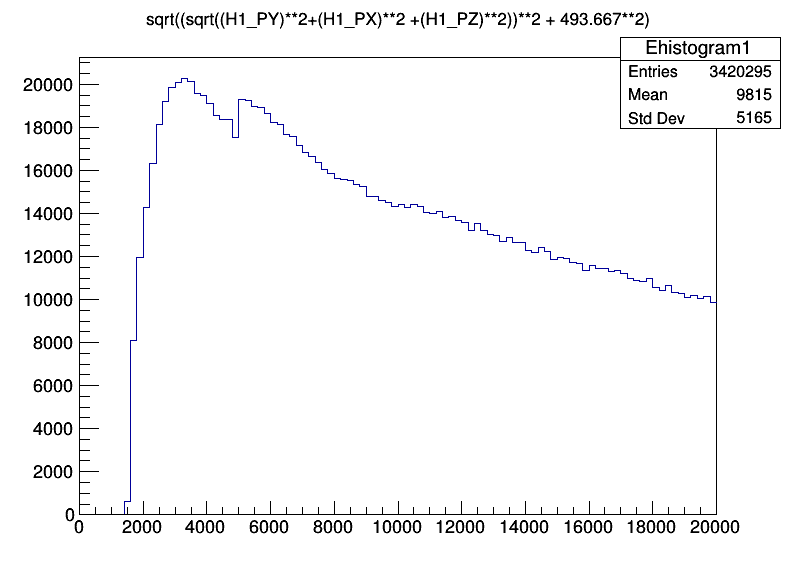

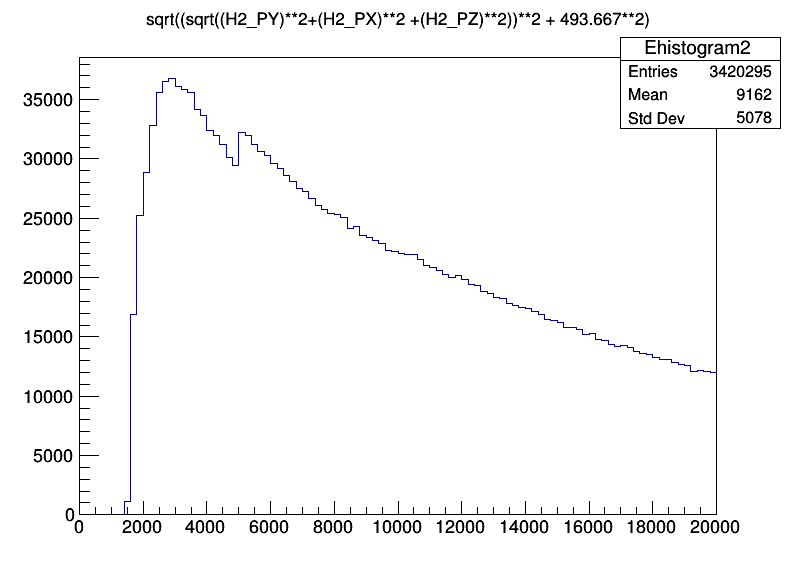

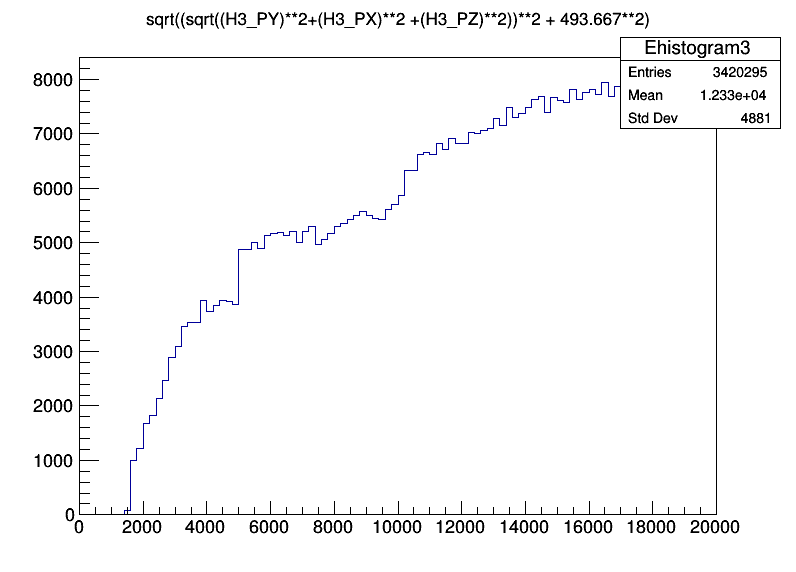

In [46]:
#let's make a function to find the energy of a Kaon, if you add in the total momentum found in the previous steps - you should be able to do so reasonably easily

def E_Kaon(HN):
  mass = 493.677 #MeV/c**2
  E = "sqrt("+p_tot_daughter(HN)+"**2 + 493.667**2)"
  return E  

tot1 = p_tot_daughter("H1")
E1 = ROOT.TCanvas("Energy1","Energy",800,600)
tree.Draw(E_Kaon("H1")+">>Ehistogram1(100,0,20000)")
Ehistogram1 = ROOT.gDirectory.Get("Ehistogram1")
E1.Draw()

tot2 = p_tot_daughter("H2")
E2 = ROOT.TCanvas("Energy2","Energy",800,600)
tree.Draw(E_Kaon("H2")+">>Ehistogram2(100,0,20000)")
Ehistogram2 = ROOT.gDirectory.Get("Ehistogram2")
E2.Draw()

tot3 = p_tot_daughter("H3")
E3 = ROOT.TCanvas("Energy3","Energy",800,600)
tree.Draw(E_Kaon("H3")+">>Ehistogram3(100,0,20000)")
Ehistogram3 = ROOT.gDirectory.Get("Ehistogram3")
E3.Draw()


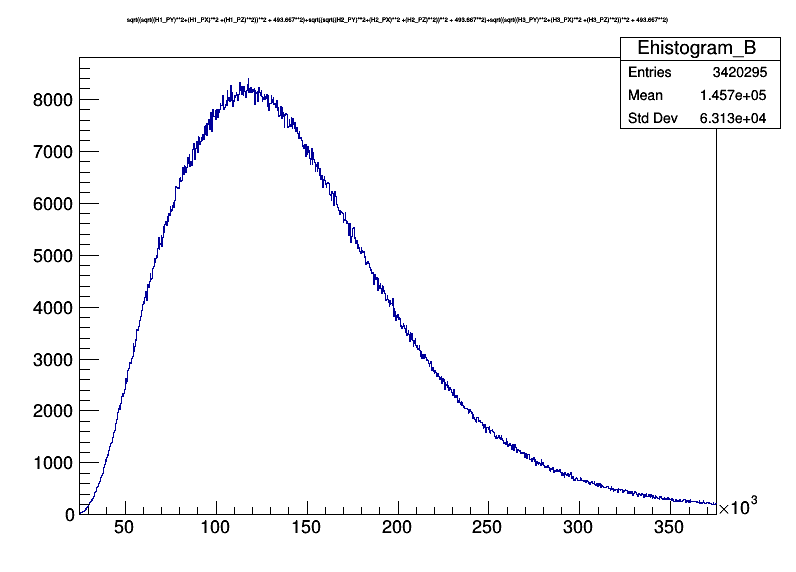

In [47]:
#Calculate the energy of the B meson, using the conservation of energy - just combine the energies to give a total
#def Energy_B(momentum1, momentum2, momentum3):
  #E = "E_Kaon(" + momentum1 + ") + E_Kaon(" + momentum2 + ") + E_Kaon(" + momentum3 + ")" 
  #return E



E_B = ROOT.TCanvas("Energy_B","Energy",800,600)
tree.Draw((E_Kaon("H1")+"+"+E_Kaon("H2")+"+"+E_Kaon("H3"))+">>Ehistogram_B(1000,25000,375000)")
Ehistogram_B = ROOT.gDirectory.Get("Ehistogram_B")
E_B.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: MomentumB


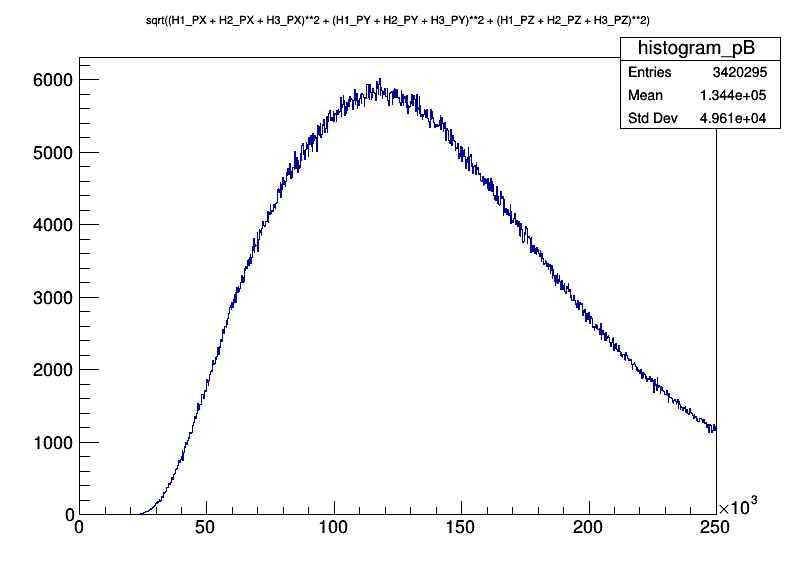

In [51]:
#Calculate the momentum of the B meson. To do this, you need to first combine all the x momenta of the daughters,
Xp_tot = "H1_PX + H2_PX + H3_PX"
Yp_tot = "H1_PY + H2_PY + H3_PY"
Zp_tot = "H1_PZ + H2_PZ + H3_PZ"

#to get a total x momentum of the mother; then you can combine your three momenta into total momentum

tot_p_B = "sqrt(("+Xp_tot+")**2 + ("+Yp_tot+")**2 + ("+Zp_tot+")**2)"


pB_tot = ROOT.TCanvas("MomentumB","Momentum",800,600)
tree.Draw((tot_p_B)+">>histogram_pB(1000,0,250000)")
histogram_pB = ROOT.gDirectory.Get("histogram_pB")
pB_tot.Draw()



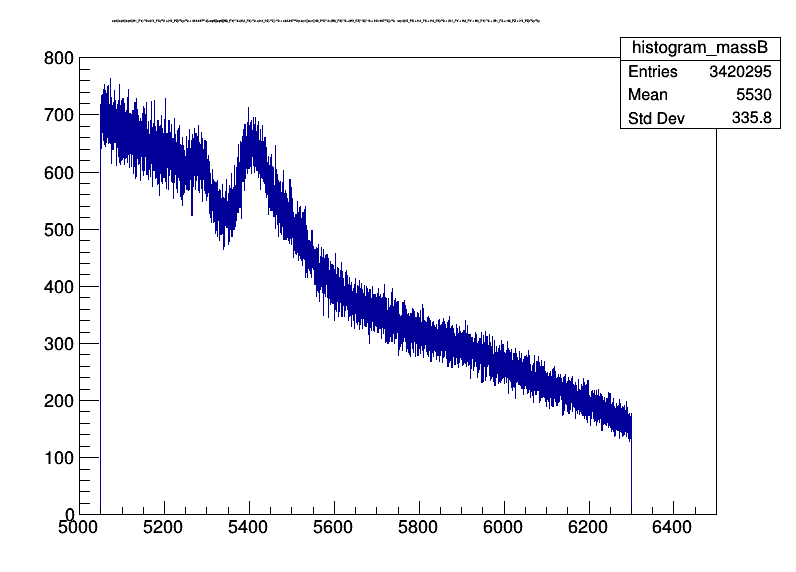

In [52]:
#Use the energy of the B meson and momentum of the B meson as inputs and
#calculate the mass of the B meson (Found by analysis of the daughter products)

Energy_Btot = E_Kaon("H1")+"+"+E_Kaon("H2")+"+"+E_Kaon("H3")

mass_B = "sqrt((" + Energy_Btot + ")**2 - "+ tot_p_B + "**2)"


mB = ROOT.TCanvas("Mass_B","Mass",800,600)
tree.Draw((mass_B)+">>histogram_massB(10000,5000,6500)")
histogram_massB = ROOT.gDirectory.Get("histogram_massB")
mB.Draw()


In [0]:

#Make plots of H1/H2/H3 _ProbK on one plot
#Make plots of H1/H2/H3 _ProbPi on one plot
#For all our particles, make a plot of the B_VertexChi2

H1_ProbK 
H2_ProbK
H3_ProbK 

H1/H2/H3_ProbPi
B_VertexChi2

H1_PK= ROOT.TCanvas("Probability H1_K","Probability",800,600)
tree.Draw(H1_ProbK+">>histogram1_PK(100,0,20000)")
histogram1_PK = ROOT.gDirectory.Get("histogram1_PK")
H1_PK.Draw()

H2_PK= ROOT.TCanvas("Probability H2_K","Probability",800,600)
tree.Draw(H2_ProbK+">>histogram2_PK(100,0,20000)")
histogram2_PK = ROOT.gDirectory.Get("histogram2_PK")
H2_PK.Draw()

H3_PK= ROOT.TCanvas("Probability H2_K","Probability",800,600)
tree.Draw(H3_ProbK+">>histogram3_PK(100,0,20000)")
histogram3_PK = ROOT.gDirectory.Get("histogram3_PK")
H3_PK.Draw()

We have now completed the initial steps and begun to work through what we need to with the data. This workflow is divided into 4 stages, just for easier viewing and comprehension.